<a href="https://colab.research.google.com/github/Espipi/Hamoye_Data_Eng_Program/blob/main/ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
df_energy = pd.read_csv(path)
display(df_energy.head(2))

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,55.2,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [2]:
df_energy.info()
print("shape \n")
df_energy.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

(19735, 29)

In [3]:
###Preprocessing
df_energy = df_energy.drop(columns=["date", "lights"])
df_energy.shape

(19735, 27)

Text(0, 0.5, 'Temperature outside the building')

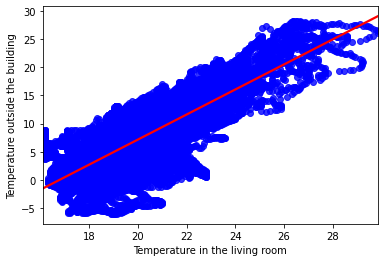

In [4]:
import seaborn as sns
sns.regplot(x = "T2", y = "T6", data = df_energy, ci=None,
            scatter_kws = {'color': 'b'}, line_kws = {'color': 'red'})
plt.xlabel("Temperature in the living room")
plt.ylabel("Temperature outside the building")

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#Normalization
scaler_m = MinMaxScaler()
normalized_df = scaler_m.fit_transform(df_energy)
#Standardisation
scaler_s = StandardScaler()
standardized_df = scaler_s.fit_transform(df_energy)

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#Normalization
scaler_m = MinMaxScaler()
X_feature = scaler_m.fit_transform(df_energy['T2'].values.reshape(-1, 1))
y_target = df_energy['T6'].values.reshape(-1, 1)

In [48]:
X = df_energy['T2'].values.reshape(-1, 1)
y = df_energy['T6'].values.reshape(-1, 1)

In [49]:
#Now, we split our dataset into the training 70% and testing dataset 30% with random 42.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.3, random_state=42)

linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)


* **Q12 -- Q16: Linear model on the relationship between the 
temperature in the living room in Celsius (T2) and the temperature outside the building (T6). What are metrics values: R², MAE, RSS, RMSE ?**

In [50]:
#Metrics
#R²
from sklearn.metrics import r2_score
r2_s = r2_score(y_test, predicted_values)

#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)

#Residual sum of squares
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))

#RMSE
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

#Metrics
print("RMSE:", round(rmse, 4))
print("RSS:", round(rss, 2))
print("R²:", round(r2_s, 2))
print("MAE:", round(mae, 3))

RMSE: 3.6303
RSS: 78033.97
R²: 0.64
MAE: 2.823


2. MultiLinear Regression

In [55]:
#Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(df_energy), columns=df_energy.columns)
features = normalized_features.drop(['Appliances'], axis=1)
target = normalized_features['Appliances']

In [57]:
# split into train an test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [59]:
# importing the linearregression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# fitting the model to the training dataset
linear_model.fit(X_train, Y_train)

# get the predictions
predicted_values = linear_model.predict(X_test)

In [60]:
##Penalization Methods
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, Y_train)

#Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, Y_train)

#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(linear_model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df


In [61]:
#Apply function on the 3 models
linear_model_weights = get_weights_df(linear_model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

* **Q 17: Which features have the lowest and highest weights respectively?**

In [62]:
display(final_weights)

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.456698,-0.456698
1,T_out,-0.321860,-0.321860,-0.321860
2,T2,-0.236178,-0.236178,-0.236178
3,T9,-0.189941,-0.189941,-0.189941
4,RH_8,-0.157595,-0.157595,-0.157595
5,RH_out,-0.077671,-0.077671,-0.077671
6,RH_7,-0.044614,-0.044614,-0.044614
7,RH_9,-0.039800,-0.039800,-0.039800
8,T5,-0.015657,-0.015657,-0.015657
9,T1,-0.003281,-0.003281,-0.003281


* **Q 18: is there any change to the root mean squared error (RMSE) when evaluated on the test set?**

In [65]:
# Root Mean Square Error to 3 decimal places for Ridge Regression
from sklearn.metrics import  mean_squared_error
predicted_values = ridge_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, predicted_values))
round(rmse, 3)

0.088

* **Q 19: How many of the features have non-zero feature weights?**

In [63]:
len(final_weights["Lasso_weight"] != 0)

26

* **Q 20: What is the new RMSE with the Lasso Regression (in 3 decimal places)?**

In [66]:
# Root Mean Square Error to 3 decimal places for Lasso Regression
from sklearn.metrics import  mean_squared_error
predicted_values = lasso_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, predicted_values))
round(rmse, 3)

0.094

**---------Next step ------>**